In [5]:
import yfinance as yf 
import pandas as pd 
import numpy as np
import arch
import matplotlib.pyplot as plt

In [18]:
data=yf.download('BTC-USD',period='1y',interval='1d')
data=data['Close']
data

[*********************100%***********************]  1 of 1 completed


Date
2022-05-26    29267.224609
2022-05-27    28627.574219
2022-05-28    28814.900391
2022-05-29    29445.957031
2022-05-30    31726.390625
                  ...     
2023-05-22    26851.277344
2023-05-23    27225.726562
2023-05-24    26334.818359
2023-05-25    26476.207031
2023-05-26    26759.255859
Name: Close, Length: 366, dtype: float64

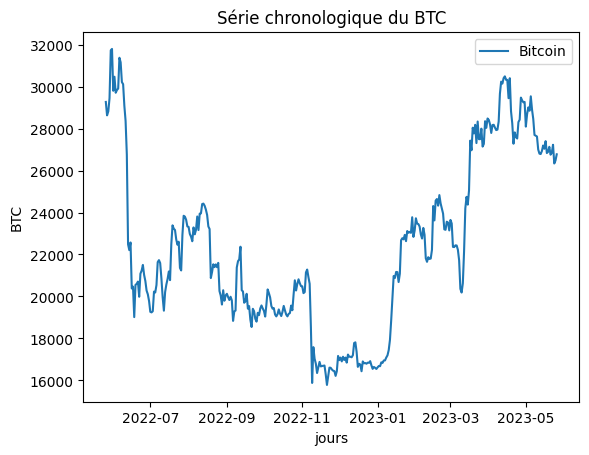

In [6]:
fig, ax = plt.subplots()
ax.plot(data.index, data['Close'], label='Bitcoin')
ax.set_title('Série chronologique du BTC')
ax.set_xlabel('jours')
ax.set_ylabel('BTC')
ax.legend()
plt.show()

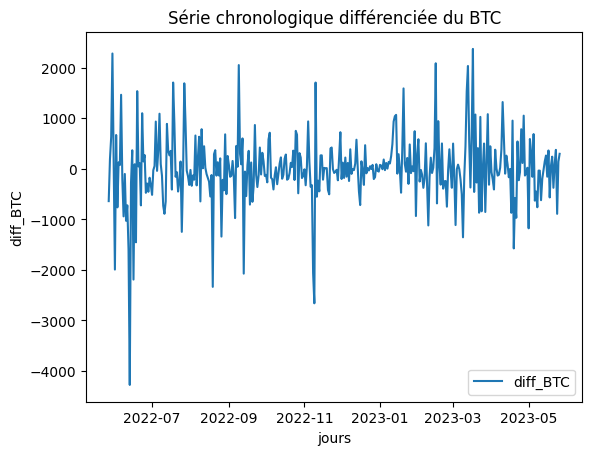

In [7]:
diff_data = data['Close'].diff().dropna()
fig, ax = plt.subplots()
ax.plot(diff_data.index, diff_data, label='diff_BTC')
ax.set_title('Série chronologique différenciée du BTC')
ax.set_xlabel('jours')
ax.set_ylabel('diff_BTC')
ax.legend()
plt.show()

In [29]:
data['Return']=diff_data
data=pd.DataFrame(data.dropna())
data

,Close,Return
Date,,
2022-05-27,28627.574219,-639.650391
2022-05-28,28814.900391,187.326172
2022-05-29,29445.957031,631.056641
2022-05-30,31726.390625,2280.433594
2022-05-31,31792.310547,65.919922
...,...,...
2023-05-22,26851.277344,97.451172
2023-05-23,27225.726562,374.449219
2023-05-24,26334.818359,-890.908203


In [30]:
train_size = int(len(diff_data) * 0.8)
train, test = diff_data[:train_size], diff_data[train_size:]

In [31]:
from arch import arch_model
import math

In [33]:
# Calculate daily std of returns (historical)
std_daily = train.std()
var_daily = train.var()
print('Daily volatility: ', '{:.3f}%'.format(std_daily))
print('Daily variance: ', '{:.3f}%'.format(var_daily))

# Convert daily volatility to monthly volatility (historical)
std_monthly = math.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.3f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility (historical)
std_annual = math.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.3f}%'.format(std_annual))

Daily volatility:  691.834%
Daily variance:  478634.532%
Monthly volatility:  3170.382%
Annual volatility:  10982.527%


In [34]:
# Calculate the initial value of omega
omega_ini = 0.0001 * var_daily
print(omega_ini)

# Calculate the initial value of alpha
alpha_ini = 0.5 * std_annual
print(alpha_ini)

# Calculate the initial value of beta
beta_ini = 0.45 * std_annual
print(beta_ini)

47.86345321727111
5491.26356377845
4942.137207400605


In [36]:
basic_gm = arch_model(diff_data, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')
gm_result = basic_gm.fit(update_freq = 180)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2869.1081933318437
            Iterations: 12
            Function evaluations: 64
            Gradient evaluations: 12


c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.607e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


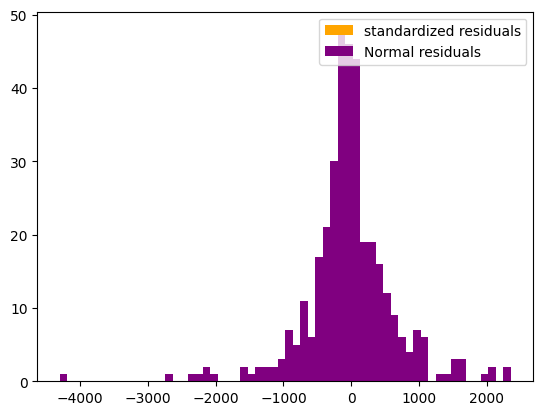

In [37]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.hist(gm_std_resid, bins = 60, 
         facecolor = 'orange', label = 'standardized residuals')
plt.hist(gm_resid, bins = 60, 
         facecolor = 'purple', label = 'Normal residuals')
plt.legend(loc = 'upper right')
plt.show()

In [40]:
%pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(data,test_size = 0.2, shuffle=False)

In [44]:
data.index

Index([2022-05-27 00:00:00, 2022-05-28 00:00:00, 2022-05-29 00:00:00,
       2022-05-30 00:00:00, 2022-05-31 00:00:00, 2022-06-01 00:00:00,
       2022-06-02 00:00:00, 2022-06-03 00:00:00, 2022-06-04 00:00:00,
       2022-06-05 00:00:00,
       ...
       2023-05-17 00:00:00, 2023-05-18 00:00:00, 2023-05-19 00:00:00,
       2023-05-20 00:00:00, 2023-05-21 00:00:00, 2023-05-22 00:00:00,
       2023-05-23 00:00:00, 2023-05-24 00:00:00, 2023-05-25 00:00:00,
       2023-05-26 00:00:00],
      dtype='object', name='Date', length=365)

In [48]:
gm_std.shape

(365,)

c:\Users\admin\Desktop\PIB study project\.venv\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.77e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      8,   Neg. LLF: 13007.403953721061
Iteration:      2,   Func. Count:     16,   Neg. LLF: 13701.701271913495
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2471.0568318941787
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2297.836549076924
Iteration:      5,   Func. Count:     41,   Neg. LLF: 2429.9546848919954
Iteration:      6,   Func. Count:     49,   Neg. LLF: 2428.595327491761
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2418.752157247765
Iteration:      8,   Func. Count:     65,   Neg. LLF: 2392.7669653063795
Iteration:      9,   Func. Count:     73,   Neg. LLF: 2399.367753117594
Iteration:     10,   Func. Count:     81,   Neg. LLF: 2378.081470582865
Iteration:     11,   Func. Count:     89,   Neg. LLF: 2378.615008193088
Iteration:     12,   Func. Count:     97,   Neg. LLF: 2369.7808463455663
Iteration:     13,   Func. Count:    105,   Neg. LLF: 2290.043106613928
Iteration:     14,   Func. Count:    113,   Neg. LLF: 2259

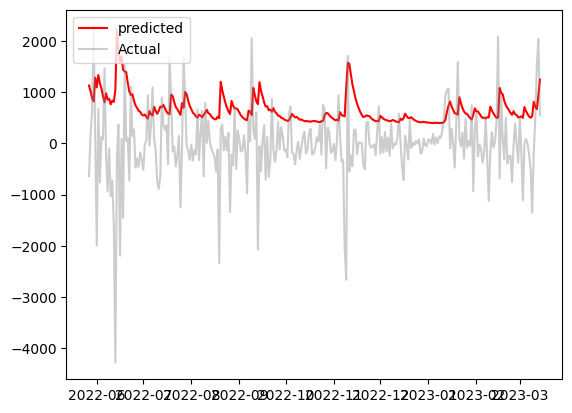

In [51]:
# Specify GARCH model assumptions
skewt_gm = arch_model(train, p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
# Fit the model
skewt_result = skewt_gm.fit()

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility

# Plot model fitting results
#plt.plot(train.index, skewt_vol, color = 'gold', label = 'Skewed-t Volatility')
plt.plot(train.index, gm_std[:292   ], color = 'red', label = 'predicted')
plt.plot(train.index, train, color = 'grey', label = 'Actual', alpha = 0.4)
plt.legend(loc = 'upper left')
plt.show()